# Ejercicio 4

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

datos1 = pd.read_csv('datos(1).csv')

datos1

,year,growth,vote,inc_party_candidate,other_candidate
0,1952,2.40,44.60,Stevenson,Eisenhower
1,1956,2.89,57.76,Eisenhower,Stevenson
2,1960,0.85,49.91,Nixon,Kennedy
3,1964,4.21,61.34,Johnson,Goldwater
4,1968,3.02,49.60,Humphrey,Nixon
5,1972,3.62,61.79,Nixon,McGovern
6,1976,1.08,48.95,Ford,Carter
7,1980,-0.39,44.70,Carter,Reagan
8,1984,3.86,59.17,Reagan,Mondale
9,1988,2.27,53.94,"Bush, Sr.",Dukakis


In [22]:
# Función para inferir el partido basándose en el nombre del candidato
def infer_party(candidate_name):
    if 'Bush' in candidate_name:
        return 'Republican'
    elif 'Reagan' in candidate_name:
        return 'Republican'
    elif 'Nixon' in candidate_name:
        return 'Republican'
    elif 'Eisenhower' in candidate_name:
        return 'Republican'
    elif 'Ford' in candidate_name:
        return 'Republican'
    elif 'McCain' in candidate_name:
        return 'Republican'
    else:
        return 'Democrat'

# Crear columnas para votos de Demócratas y Republicanos
datos1['party'] = datos1['inc_party_candidate'].apply(infer_party)
datos1['democrat_votes'] = datos1.apply(lambda row: row['vote'] if row['party'] == 'Democrat' else 100 - row['vote'], axis=1)
datos1['republican_votes'] = datos1.apply(lambda row: row['vote'] if row['party'] == 'Republican' else 100 - row['vote'], axis=1)


datos1

,year,growth,vote,inc_party_candidate,other_candidate,party,party_votes,democrat_votes,republican_votes
0,1952,2.40,44.60,Stevenson,Eisenhower,Democrat,44.60,44.60,55.40
1,1956,2.89,57.76,Eisenhower,Stevenson,Republican,42.24,42.24,57.76
2,1960,0.85,49.91,Nixon,Kennedy,Republican,50.09,50.09,49.91
3,1964,4.21,61.34,Johnson,Goldwater,Democrat,61.34,61.34,38.66
4,1968,3.02,49.60,Humphrey,Nixon,Democrat,49.60,49.60,50.40
5,1972,3.62,61.79,Nixon,McGovern,Republican,38.21,38.21,61.79
6,1976,1.08,48.95,Ford,Carter,Republican,51.05,51.05,48.95
7,1980,-0.39,44.70,Carter,Reagan,Democrat,44.70,44.70,55.30
8,1984,3.86,59.17,Reagan,Mondale,Republican,40.83,40.83,59.17
9,1988,2.27,53.94,"Bush, Sr.",Dukakis,Republican,46.06,46.06,53.94


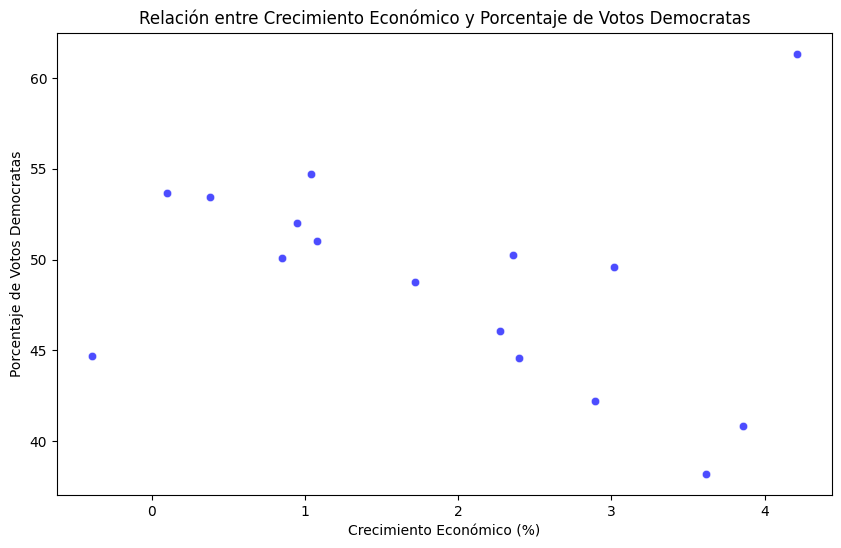

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='growth', y='democrat_votes', data=datos1, color='blue', alpha=0.7)
plt.title('Relación entre Crecimiento Económico y Porcentaje de Votos Democratas')
plt.xlabel('Crecimiento Económico (%)')
plt.ylabel('Porcentaje de Votos Democratas')
plt.show()

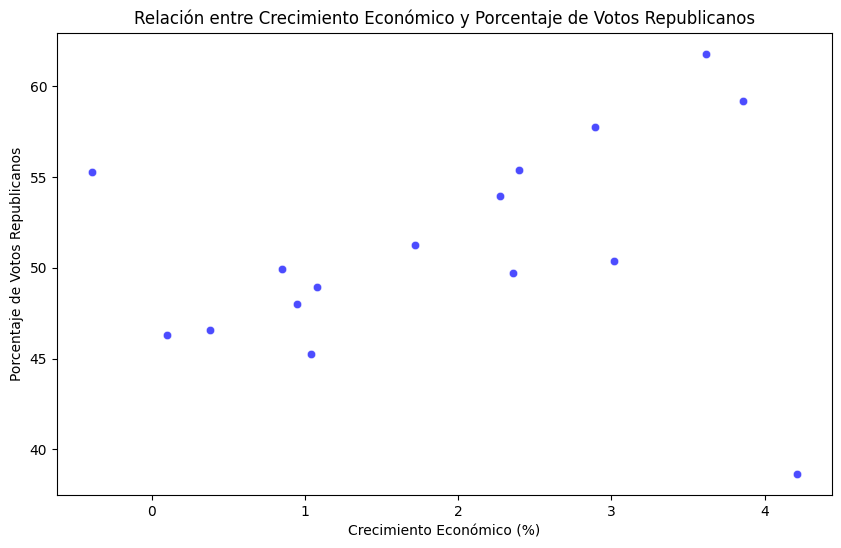

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='growth', y='republican_votes', data=datos1, color='blue', alpha=0.7)
plt.title('Relación entre Crecimiento Económico y Porcentaje de Votos Republicanos')
plt.xlabel('Crecimiento Económico (%)')
plt.ylabel('Porcentaje de Votos Republicanos')
plt.show()


In [27]:
# Define las variables independientes (X) y dependientes (Y)
X = datos1['growth'].values.reshape(-1, 1)
Y = datos1['republican_votes'].values

# Crea el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Ajusta el modelo a tus datos
modelo_regresion.fit(X, Y)

# Imprime los coeficientes estimados
print('Intersección (beta_0):', modelo_regresion.intercept_)
print('Pendiente (beta_1):', modelo_regresion.coef_[0])

# Predicción para las elecciones entre Hillary y Trump con un crecimiento del 2% en 2015
crecimiento_2015 = 2
prediccion = modelo_regresion.predict([[crecimiento_2015]])
print('Predicción para 2% de crecimiento en 2015 para Trump:', prediccion[0])
print('Predicción para 2% de crecimiento en 2015 para Hilary:', 100 - prediccion[0])


Intersección (beta_0): 49.15425067350383
Pendiente (beta_1): 1.0511195396554263
Predicción para 2% de crecimiento en 2015 para Trump: 51.25648975281469
Predicción para 2% de crecimiento en 2015 para Hilary: 48.74351024718531


Para desarrollar un modelo de regresión lineal, primero necesitamos analizar los datos y comprender la relación entre el porcentaje de votos para el partido del presidente saliente (Y) y el crecimiento económico medido en ingreso personal en el año previo a las elecciones (X). 

La regresión lineal puede representarse como:

$$ Y = \beta_0 + \beta_1X + \epsilon $$

Donde:
- \( Y \) es el porcentaje de votos para el partido del presidente saliente.
- \( X \) es el porcentaje de crecimiento económico en el año previo a las elecciones.
- \( $\beta_0$ \) es la intersección y \( $\beta_1$ \) es la pendiente de la línea de regresión.
- \( $\epsilon $\) es el término de error.

Utilizamos técnicas de regresión lineal para estimar los valores de $ \beta_0 $ y $ \beta_1 $ a partir de los datos.




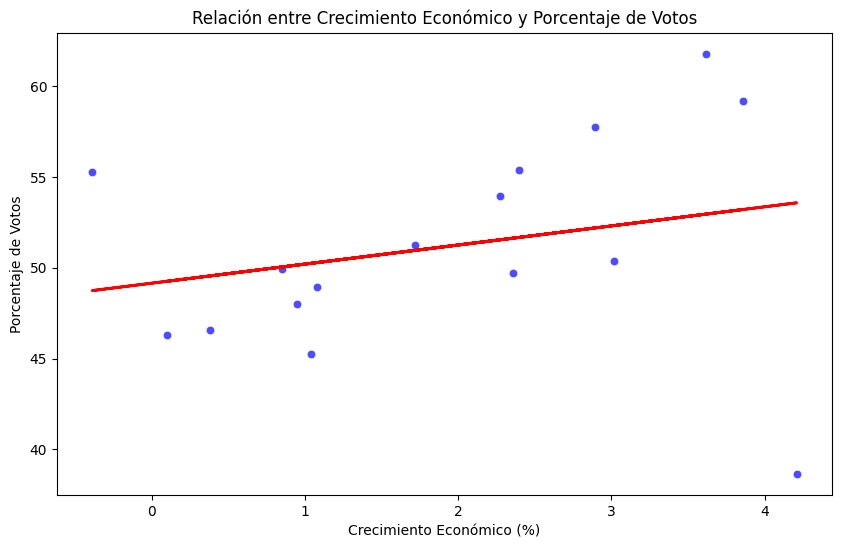

In [28]:
# Predicciones
predicciones = modelo_regresion.predict(X)

# Gráfico de dispersión y línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='growth', y='republican_votes', data=datos1, color='blue', alpha=0.7)
plt.plot(datos1['growth'], predicciones, color='red', linewidth=2)
plt.title('Relación entre Crecimiento Económico y Porcentaje de Votos')
plt.xlabel('Crecimiento Económico (%)')
plt.ylabel('Porcentaje de Votos')
plt.show()

# Comentarios

De acuerdo a los datos, nos percatamos de que los datos estan incompletos para hacer una predicción para un partido en especifico, ya que los votos que muestran son del partido actual en el poder, es decir, están mezclados entre partidos, por lo que hacer una predicción con estos datos sería incorrecto. Por lo que creamos dos columnas para tener los votos por partido politico.

Haciendo un analisis de los datos, notamos que se ajustan mejor a una regresión lineal los votos del partido republicano por lo que con estos datos predecimos los votos para Trump y los restantes para el partido democrata Hillary